In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
n=float(input("ingrese un número entre 0-2pi:"))
def term(x,N):
    Nterm=x
    if N==1:
        return Nterm
    if N<1:
        Nterm=0.
        return Nterm
    else:
        Nterm=term(x,N-1)*(-x**2)/((2*N-1)*(2*N-2))
        return Nterm

def McLaurinSin(x,N):
    suma=0.0
    for i in range(N):
        suma+=term(x,N)
        N=N-1
    return suma

print ("McLaurinSin(pi/3)",McLaurinSin(n,10))  
print ("Seno(pi/3) Numpy",sin(n))

ingrese un número entre 0-2pi:1.04718755
McLaurinSin(pi/3) 0.8660204031428282
Seno(pi/3) Numpy 0.866020403143


In [62]:
terminos = [] 
xlin = linspace(0,45,100) 
numTerm = 1 
i=0

print("El valor limite que alcanza a converger",xlin[77])

while i<77:
    dif=abs(sin(xlin[i])-McLaurinSin(xlin[i],numTerm))
    if dif<0.01:
        terminos.append(numTerm)
        i+=1
    else:
        numTerm+=1
print("La lista con el numeros de terminos que suma para cada una de las 77 iteraciones")     
print(terminos)   

El valor limite que alcanza a converger 35.0
La lista con el numeros de terminos que suma para cada una de las 77 iteraciones
[1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10, 11, 11, 12, 13, 13, 14, 15, 15, 16, 16, 17, 18, 18, 19, 19, 20, 21, 21, 22, 22, 23, 24, 24, 25, 26, 26, 27, 27, 28, 29, 29, 30, 30, 31, 32, 32, 33, 33, 34, 35, 35, 36, 37, 37, 38, 38, 39, 40, 40, 41, 41, 42, 43, 43, 44, 45, 45, 46, 46, 47, 48]


#Dificultades
En un principio el bloque de código anterior se ejecuto para los 100 valores de `xlin=linspace(0,45,100)`, pero al correrse se encontró que **while** nunca era cumplido. La razón de esto tiene que ver con la convergencia de la serie de McLaurin cuando se tienen valores muy grandes. (Más de esto al final)

Así que colocando un simple `print("iteración",i)` dentro del while, se pudo establecer que apartir de la iteración **78** no se tiene convergencia entre _la función creada y la de numpy_ menor a **0.01**. Así se encontró que el valor límite que alcanza a converger es el elemento 77 que corresponde a **35.0**, teniendo que sumar **48 términos**. 

**Nota:** Se dejó correr la función con un `print("iteración",i)` y `print("#terminos",numTerm)` y se llegó a más de **200!** sin alcanzar una convergencia para el elemento **78**

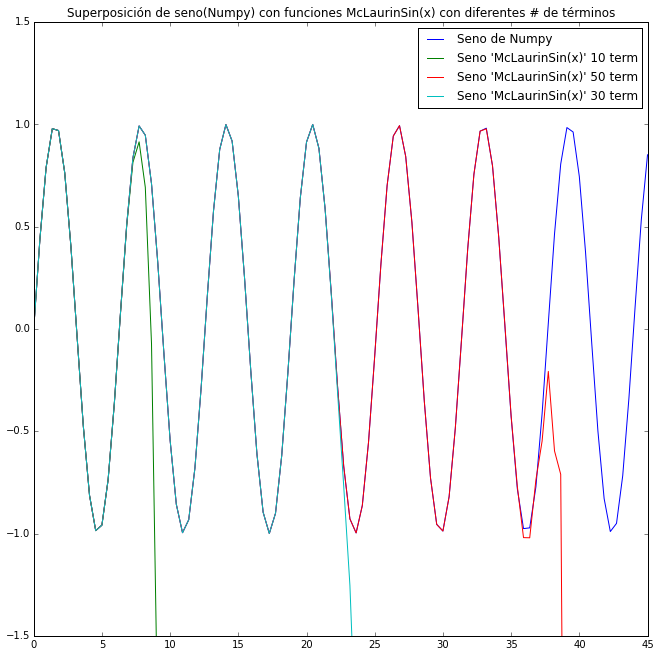

In [71]:
McLSin=vectorize(McLaurinSin)
fig=figure(figsize(11,11))
t=linspace(0, 45, 100)
plot(t, sin(t), label = "Seno de Numpy")
plot(t, McLSin(t, 10), label = "Seno 'McLaurinSin(x)' 10 term")
plot(t, McLSin(t, 50), label = "Seno 'McLaurinSin(x)' 50 term")
plot(t, McLSin(t, 30), label = "Seno 'McLaurinSin(x)' 30 term")
ylim(-1.5,1.5)
title("Superposición de seno(Numpy) con funciones McLaurinSin(x) con diferentes # de términos")
legend()

#Consideraciones Finales
Con el resultado anterior se evidenciaron varias cosas con respecto a las series de McLaurin. La primera de ellas es la **convergencia**: ya que la serie de McLaurin de alguna función es una serie de infinitos términos, se tiene que ninguna _suma finita de McLaurin_ convergerá al valor _exacto_ de la función. Al presentarse la imposibilidad, por motivos de recursos, de sumar infinitos términos en un computador se tienen apróximaciones que conllevan a tener una incertidumbres computacionales. La segunda cosa es el **consumo de recursos**, ya que la suma en series infinitas implica tener un número grande de interaciones, se manejan expresiones individuales muy grandes que pueden rayar con la capacidad de almacenar y procesar esos valores de manera _exacta_ por parte del computador. Finalmente se tienen las **propiedades**, aunque no todas las series de McLaurin presentan propiedades útiles, en el caso de la función seno se pudo mejorar el código teniendo en cuenta la periocidad de la función ya que implica un ahorro en recursos al momento de realizar cálculos para valores muy grandes. 

En la gráfica anterior se puede ver el momento (valores) para los cuales la función creada a partir de la serie de McLaurin para determinados números de términos deja de converger.